In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

import pb_g2_inference_stats as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/
Device: cpu


In [4]:
modelexp_nm = 'modelexp_simplev2_rs'

df = pd.read_csv(parent_script.out_dir + f'stats_{modelexp_nm}.csv', index_col = 0)
df['Int name'] = df['Experiment index']

# hparam annotations
modelexp_df = pd.read_csv(_config.DATA_DIR + f'{modelexp_nm}.csv')
modelexp_df['Int name'] = modelexp_df['Name']

df = df.merge(modelexp_df, on = 'Int name')

print(df.columns)

Index(['Experiment name', 'Experiment index', 'Last epoch',
       'Mean epoch time (microseconds)', 'Median epoch time (microseconds)',
       'Int name', 'random_seed', 'alpha_marginal', 'beta_skew', 'dataset',
       'Name'],
      dtype='object')


## plots

beta_skew,0.0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1.0
alpha_marginal,,,,,,,,,,
0.1,567.888889,582.444444,569.222222,604.222222,672.888889,581.222222,628.555556,587.777778,649.666667,829.000000
0.3,584.333333,574.444444,530.111111,537.777778,569.000000,518.000000,590.000000,599.333333,546.333333,567.222222
0.5,588.666667,607.111111,592.777778,599.888889,599.666667,624.555556,615.222222,607.111111,609.222222,684.555556
1.0,750.222222,742.444444,763.444444,742.777778,753.111111,740.111111,752.000000,728.444444,765.111111,731.444444
3.0,460.000000,486.888889,490.777778,479.666667,477.222222,484.555556,502.444444,468.333333,484.000000,478.111111
5.0,472.000000,465.222222,457.333333,467.555556,472.555556,481.111111,474.222222,458.777778,475.222222,457.666667
10.0,482.555556,476.888889,476.333333,471.444444,479.777778,483.888889,492.888889,482.888889,488.777778,503.000000
30.0,577.333333,584.666667,589.111111,584.888889,577.888889,596.333333,599.333333,579.444444,606.222222,586.444444
50.0,700.333333,682.222222,709.777778,687.777778,698.333333,696.777778,683.333333,690.777778,696.666667,690.444444


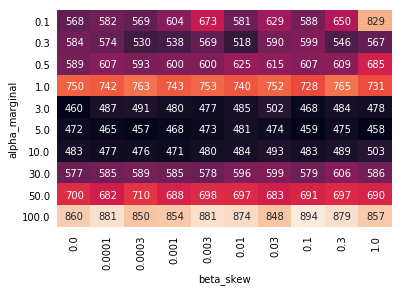

In [16]:
matrix = df.groupby(['beta_skew', 'alpha_marginal'])['Last epoch'].agg('mean').reset_index().pivot(columns = 'beta_skew', index = 'alpha_marginal', values = 'Last epoch')

display(matrix)

fig, ax = plt.subplots()
sns.heatmap(
    matrix,
    annot = True,
    fmt = '.0f',
    ax = ax,
    cbar = False,
)
sns.despine(trim = True, bottom = True, left = True)
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks_position('none') 